In [1]:
from utils import create_polynomial, compute_borda, full_rank_aggregation
from classes import Voter
from visualize import ranking_text, plot_ranking
import random

In [2]:
NUM_VOTERS = 50
CANDIDATES = [1, 2, 3, 4, 5]

In [3]:
def simulate_election():

    voters = []
    for _ in range(NUM_VOTERS):
        voter = Voter()
        # Create a random polynomial utility function for each voter
        coefficients = [random.uniform(-100, 100) for _ in range(4)]  # Quadratic polynomial
        ut_func = create_polynomial(coefficients)
        voter.set_utility_function(ut_func)
        voters.append(voter)

    comparisons = []
    full_ranks = []
    for i in range(len(CANDIDATES)):
        for j in range(i + 1, len(CANDIDATES)):
            candidate_1 = CANDIDATES[i]
            candidate_2 = CANDIDATES[j]
            for voter in voters:
                preference = voter.get_preference(candidate_1, candidate_2)
                if preference is not None:
                    comparisons.append(preference)
                
                full_rank = voter.get_rank(CANDIDATES)
                full_ranks.append(full_rank)

    borda_scores = compute_borda(comparisons)
    full_rank_aggregated = full_rank_aggregation(full_ranks)
    return borda_scores, full_rank_aggregated

In [4]:
outputs = simulate_election()

In [5]:
outputs[0], outputs[1]

({1: 30, 2: 0, 3: 5, 4: -5, 5: -30},
 {1: 1060, 2: 1000, 3: 1010, 4: 990, 5: 940})

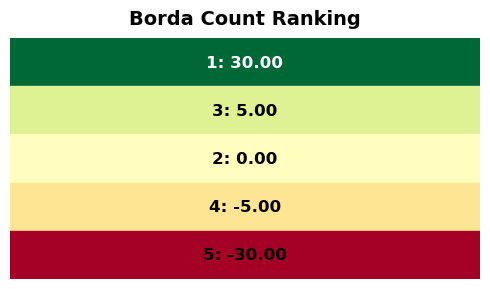

In [6]:
ranking_text(outputs[0])
plot_ranking(outputs[0], title="Borda Count Ranking")

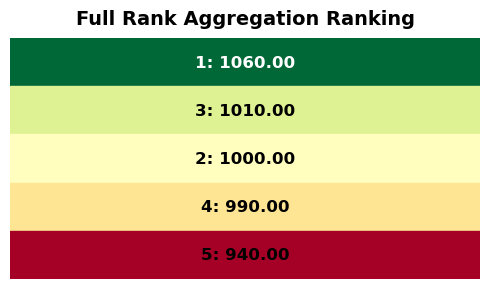

In [7]:
ranking_text(outputs[1])
plot_ranking(outputs[1], title="Full Rank Aggregation Ranking")

In [8]:
def simulate_limited_election(num_comparisons=0):

    voters = []
    for _ in range(NUM_VOTERS):
        voter = Voter()
        # Create a random polynomial utility function for each voter
        coefficients = [random.uniform(-100, 100) for _ in range(4)]  # Quadratic polynomial
        ut_func = create_polynomial(coefficients)
        voter.set_utility_function(ut_func)
        voters.append(voter)

    comparisons = []
    C = len(CANDIDATES)
    for i in range(num_comparisons):
        # for j in range(i + 1, len(CANDIDATES)):
        #     candidate_1 = CANDIDATES[i]
        #     candidate_2 = CANDIDATES[j]
        candidate_1 = random.choice(CANDIDATES)
        candidate_2 = random.choice(CANDIDATES)
        for voter in voters:
            preference = voter.get_preference(candidate_1, candidate_2)
            if preference is not None:
                comparisons.append(preference)

    full_ranks = []   
    for i in range(NUM_VOTERS):
        voter = voters[i]
        full_rank = voter.get_rank(CANDIDATES)
        full_ranks.append(full_rank)

    borda_scores = compute_borda(comparisons)
    full_rank_aggregated = full_rank_aggregation(full_ranks)
    return borda_scores, full_rank_aggregated

In [11]:
C = len(CANDIDATES)
outputs = simulate_limited_election(num_comparisons=int(0.5 * C * (C - 1)))

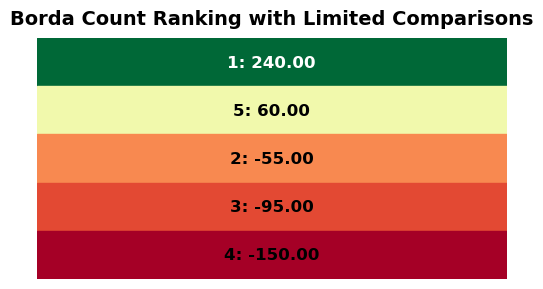

In [12]:
plot_ranking(outputs[0], title="Borda Count Ranking with Limited Comparisons")

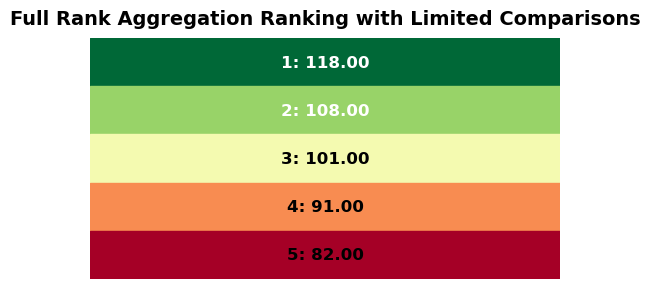

In [13]:
plot_ranking(outputs[1], title="Full Rank Aggregation Ranking with Limited Comparisons")